Adat betölrés

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

#file_id2 = '19PHNqp17cr9A__kb0aWufz1zZ8J6gGps'
file_id3 = '1r_FUlmiCNkyR4wClU7RbTevJtkAI9m0i'

#download = drive.CreateFile({'id': file_id2})

# Download the file to a local disc
#download.GetContentFile('apartments_pl_2023_09.csv')

#load data
#df_september  = pd.read_csv("apartments_pl_2023_09.csv")
#df_september.head()

download = drive.CreateFile({'id': file_id3})

# Download the file to a local disc
download.GetContentFile('apartments_pl_2023_10.csv')

#load data
df_october  = pd.read_csv("apartments_pl_2023_10.csv")
df_october.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
2,ede1c0d953ff85f3cd9676d39ca8f62d,szczecin,blockOfFlats,37.00,2.0,8.0,10.0,1970.0,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,yes,yes,429995
3,6c807c6c86a74c57a3fd4445a1f49a46,szczecin,apartmentBuilding,48.00,2.0,4.0,6.0,NaN,53.435461,14.570436,...,0.177,condominium,brick,NaN,no,yes,no,no,no,550000
4,bb14c9a540275da73f6cb6ed42e5c26c,szczecin,apartmentBuilding,55.19,2.0,1.0,2.0,2013.0,53.482094,14.542574,...,0.043,condominium,brick,premium,yes,yes,no,yes,yes,607000


In [ ]:
#df_september['Month'] = 0
df_october['Month'] = 1

In [ ]:
frames = [df_october]
data = pd.concat(frames)
data.isnull().sum()

id                          0
city                        0
type                     3785
squareMeters                0
rooms                       0
floor                    3046
floorCount                242
buildYear                2905
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             21
clinicDistance             85
postOfficeDistance         25
kindergartenDistance       22
restaurantDistance         53
collegeDistance           505
pharmacyDistance           29
ownership                   0
buildingMaterial         6483
condition               12517
hasParkingSpace             0
hasBalcony                  0
hasElevator               894
hasSecurity                 0
hasStorageRoom              0
price                       0
Month                       0
dtype: int64

In [ ]:
data.describe()

Adat tisztítás

In [ ]:
data.drop(['buildingMaterial','condition','Month','latitude','longitude','id','poiCount'], axis=1, inplace=True)

In [ ]:
data['type']=data['type'].fillna('unknown')
data['floor']=data['floor'].fillna(data['floor'].mean())
data['buildYear']=data['buildYear'].fillna(data['buildYear'].mean())
#data['condition']=data['condition'].fillna('unknown')

In [ ]:
data = data.dropna()
data.shape

(15135, 22)

In [ ]:
def remplace(x):
    lista = ['yes','no']
    return np.random.choice(lista) if pd.isna(x) else x
data['hasElevator']=data['hasElevator'].map(remplace)

<ipython-input-10-d84f2b79aa2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hasElevator']=data['hasElevator'].map(remplace)


In [ ]:
data.isnull().sum()

city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
centreDistance          0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
dtype: int64

Adat analízis

In [ ]:
type =  data["type"].value_counts()
print(type)

In [ ]:
figure, axe = plt.subplots()
axe.set_title('type')
axe.pie(type,labels=['blockOfFlats','unknown','tenement','apartmentBuilding'],colors=['#FFFF00',"#808080",'#FFA07A','#008000'],autopct='%1.1f%%',
        explode=(0,0.1,0,0))
plt.show()

In [ ]:
city=data.value_counts('city')
print(city)

In [ ]:
figure, axe = plt.subplots()
axe.set_title('type')
axe.pie(city,autopct='%1.1f%%',labels=['warszawa','krakow', 'wroclaw','gdansk','lodz','bydgoszcz','gdynia','poznan','lublin','katowice','szczecin','radom','bialystok','czestochowa','rzeszow']
        ,explode=(0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.show()

In [ ]:
room=data.value_counts('rooms')
print(room)

In [ ]:
sns.countplot(data=data,x="rooms")

In [ ]:
floor=data.value_counts('floor')
print(floor)

In [ ]:
sns.histplot(data=data,x='floor')

In [ ]:
sns.histplot(data=data,x='squareMeters')

In [ ]:
sns.histplot(data=data,x='price')

In [ ]:
sns.countplot(data=data,x="ownership")

In [ ]:
sns.scatterplot(data=data,x='floor',y="price")

In [ ]:
sns.scatterplot(data=data,x='squareMeters',y='price')

Szöveges cellák Encódolása számmá(nem használtam mert nem tudtam hogy melyik szöveg melyik számmá vált)


In [ ]:
#def hotencode(dataframe,colonne):
 # ohe = pd.get_dummies(dataframe[colonne],prefix=colonne)
  #ohe.head()
 # dataframe = dataframe.join(ohe)
 # return dataframe

In [ ]:
#data = hotencode(data,"type")
#data = hotencode(data,"city")
#data = hotencode(data,"ownership")
#data = hotencode(data,"condition")
data.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,clinicDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,unknown,53.80,2.0,5.0,5.0,1984.573957,0.79,0.147,0.437,...,0.009,0.465,0.073,cooperative,no,no,yes,no,no,420000
1,szczecin,tenement,73.02,3.0,2.0,3.0,1984.573957,3.24,0.275,0.672,...,0.300,1.857,0.280,condominium,no,no,no,no,no,565000
2,szczecin,blockOfFlats,37.00,2.0,8.0,10.0,1970.000000,2.15,0.273,0.492,...,0.348,1.404,0.205,cooperative,no,yes,yes,yes,yes,429995
3,szczecin,apartmentBuilding,48.00,2.0,4.0,6.0,1984.573957,1.48,0.293,1.009,...,0.176,0.895,0.177,condominium,no,yes,no,no,no,550000
4,szczecin,apartmentBuilding,55.19,2.0,1.0,2.0,2013.000000,6.64,1.769,2.783,...,0.172,3.209,0.043,condominium,yes,yes,no,yes,yes,607000


Szöveg kódolása számmá Szótár segítségével

In [ ]:
Type={
    'unknown':0,
    'tenement':1,
    'apartmentBuilding':2,
    'blockOfFlats':3,
}
data['type']=data['type'].map(Type)
city={
    'warszawa':0,
    'krakow':1,
    'gdansk':2,
    'szczecin':3,
    'gdynia':4,
    'poznan':5,
    'bialystok':6,
    'wroclaw':7,
    'radom':8,
    'rzeszow':9,
    'lodz':10,
    'katowice':11,
    'lublin':12,
    'czestochowa':13,
    'bydgoszcz':14,
}
data['city']=data['city'].map(city)
ownership={
    'condominium':0,
    'cooperative':1,
}
data['ownership']=data['ownership'].map(ownership)
hasParkingSpace={
    'no':0,
    'yes':1
}
data['hasParkingSpace']=data['hasParkingSpace'].map(hasParkingSpace)

hasBalcony={
    'no':0,
    'yes':1
}
hasElevator={
    'no':0,
    'yes':1
}
hasSecurity={
    'no':0,
    'yes':1
}
hasStorageRoom={
    'no':0,
    'yes':1
}

data['hasBalcony']=data['hasBalcony'].map(hasParkingSpace)
data['hasElevator']=data['hasElevator'].map(hasParkingSpace)
data['hasSecurity']=data['hasSecurity'].map(hasSecurity)
data['hasStorageRoom']=data['hasStorageRoom'].map(hasStorageRoom)


<ipython-input-14-cefafc8f366a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type']=data['type'].map(Type)
<ipython-input-14-cefafc8f366a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city']=data['city'].map(city)


In [ ]:
#data['id'] = range(1, len(data) + 1)
data.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,clinicDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,3,0,53.80,2.0,5.0,5.0,1984.573957,0.79,0.147,0.437,...,0.009,0.465,0.073,1.0,0,0,1,0,0,420000
1,3,1,73.02,3.0,2.0,3.0,1984.573957,3.24,0.275,0.672,...,0.300,1.857,0.280,0.0,0,0,0,0,0,565000
2,3,3,37.00,2.0,8.0,10.0,1970.000000,2.15,0.273,0.492,...,0.348,1.404,0.205,1.0,0,1,1,1,1,429995
3,3,2,48.00,2.0,4.0,6.0,1984.573957,1.48,0.293,1.009,...,0.176,0.895,0.177,0.0,0,1,0,0,0,550000
4,3,2,55.19,2.0,1.0,2.0,2013.000000,6.64,1.769,2.783,...,0.172,3.209,0.043,0.0,1,1,0,1,1,607000


In [ ]:
#data.drop(['hasParkingSpace',"hasBalcony","hasElevator","hasSecurity","hasStorageRoom",'condition'],axis=1,inplace=True)

In [ ]:
data = data.dropna()

In [ ]:
Outlierek törlése

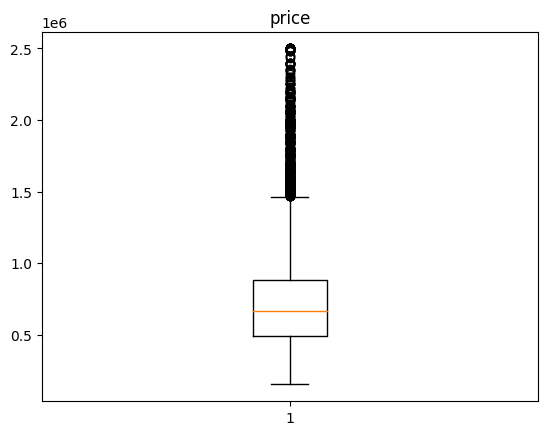

In [ ]:
price = data['price'].values
figure, axe = plt.subplots()
axe.set_title('price')
axe.boxplot(price)
plt.show()

In [ ]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

IQR = Q3 - Q1
Felsolimit = Q3 + 1.5 * IQR
Alsolimit = Q1 - 1.5 * IQR
print('Alsolimit {}  Felsolimit {}'.format(Alsolimit, Felsolimit))

Alsolimit -97500.0  Felsolimit 1466500.0


In [ ]:
outlier_indices = data[(data['price'] < Alsolimit) | (data['price'] > Felsolimit)].index
df_no_outliers = data.drop(index=outlier_indices)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15134 entries, 0 to 16689
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  15134 non-null  int64  
 1   type                  15134 non-null  int64  
 2   squareMeters          15134 non-null  float64
 3   rooms                 15134 non-null  float64
 4   floor                 15134 non-null  float64
 5   floorCount            15134 non-null  float64
 6   buildYear             15134 non-null  float64
 7   centreDistance        15134 non-null  float64
 8   schoolDistance        15134 non-null  float64
 9   clinicDistance        15134 non-null  float64
 10  postOfficeDistance    15134 non-null  float64
 11  kindergartenDistance  15134 non-null  float64
 12  restaurantDistance    15134 non-null  float64
 13  collegeDistance       15134 non-null  float64
 14  pharmacyDistance      15134 non-null  float64
 15  ownership          

Gépitanulás

In [ ]:
y=data['price'].values
x=data.drop(['price'],axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

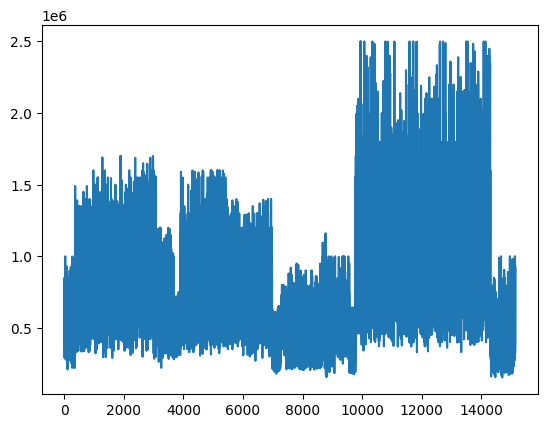

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y)),y)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
y_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

mape = mean_absolute_percentage_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print('Linear Regression')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Linear Regression
Mean Absolute Percentage Error: 0.21152152827884546
Mean Absolute Error: 140474.58662619715
Mean Squared Error: 39217472658.93826
R-squared: 0.687506366654842


In [ ]:
y_pred.shape

(3027,)

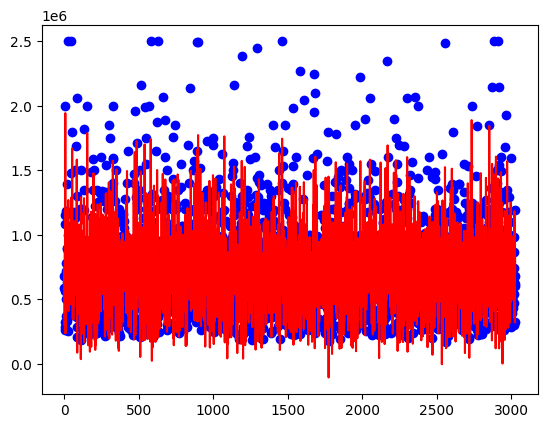

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(ytest)),ytest,'ob')
plt.plot(range(len(ytest)),y_pred,'-r')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=180,max_depth=50,min_samples_leaf=2,max_leaf_nodes=90)
regressor.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=50, max_leaf_nodes=90, min_samples_leaf=2,
                      n_estimators=180)

In [ ]:
y_pred = regressor.predict(xtest)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

mape = mean_absolute_percentage_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Percentage Error: 0.16063840724068706
Mean Absolute Error: 111714.52831218993
Mean Squared Error: 24406483800.662815
R-squared: 0.8055236535414378


In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='linear', C=1.0, epsilon=0.4)  #hyperparameters
model.fit(xtrain, ytrain)

SVR(epsilon=0.4, kernel='linear')

In [ ]:
y_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

mape = mean_absolute_percentage_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Percentage Error: 0.21859717939328893
Mean Absolute Error: 157905.36023084243
Mean Squared Error: 55270421747.99302
R-squared: 0.5595928616115677


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0)  # Adjust hyperparameters as needed
model.fit(xtrain, ytrain)

GradientBoostingRegressor(max_depth=5, random_state=0)

In [ ]:
y_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error, r2_score

mape = mean_absolute_percentage_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Percentage Error: 0.13068566298316972
Mean Absolute Error: 94635.18637204406
Mean Squared Error: 19297081021.65873
R-squared: 0.8462365228413145


In [ ]:
import joblib

joblib.dump(model, 'mymodel.joblib')

['mymodel.joblib']

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
!pip install forex-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import joblib as joblib
import pandas as pd
import numpy as np
from forex_python.converter import CurrencyRates

cr = CurrencyRates()

#cache
#@st.cache(allow_output_mutation=True)

def load_model():
  model = loaded_model = joblib.load('/content/mymodel.joblib')
  return model

model = load_model()

st.title("Lengyel Lakás ár Prediktor")

city = st.selectbox(
    "Város",
     ("Varsó","Krakkó","Gdansk","Szczecin","Gdynia","Poznań","Białystok","Boroszló","Radom","Rzeszów","Łódź","Katowice","Lublin","Częstochowa","Bydgoszcz"),
     index=0)

Type = st.radio('Típus:', ['Kertesház','Társasház','Panelház'], index=0)

squareMeters = st.slider('Lakás terültete négyzetméterben', 10, 200, 105)

rooms = st.slider('Szoba szám', 1, 10, 5)

floor = st.slider('Az emelet ahol az ingatlan található', 1, 10, 5)

floorCount = st.slider('Az épületben található emeletek száma', 1, 10, 5)

buildYear = st.slider('Az épületben építésének éve', 1800, 2023, 1910)

centreDistance = st.slider('A városközpont távolsága KM-ben', 0, 14, 7)

schoolDistance = st.slider('A iskola távolsága méterben', 1, 500, 250)
clinicDistance = st.slider('A kórház távolsága méterben', 1, 500, 250)
postOfficeDistance = st.slider('A posta távolsága méterben', 1, 500, 250)
kindergartenDistance = st.slider('A óvoda távolsága méterben', 1, 500, 250)
restaurantDistance = st.slider('A étterem távolsága méterben', 1, 500, 250)
collegeDistance = st.slider('A egyetem távolsága méterben', 1, 500, 250)
pharmacyDistance = st.slider('A gyógyszertár távolsága méterben', 1, 500, 250)
ownership = st.radio('Tulajdon', ['Lakásszövetkezet','Magántulajdon'], index=0)
hasParkingSpace = st.radio('Van parkolóhely', ['Igen','Nem'], index=0)
hasBalcony = st.radio('Van erkély', ['Igen','Nem'], index=0)
hasElevator = st.radio('Van lift', ['Igen','Nem'], index=0)
hasSecurity = st.radio('Van riasztó', ['Igen','Nem'], index=0)
hasStorageRoom = st.radio('Van tároló', ['Igen','Nem'], index=0)

bemenet = {'city': [city], 'type': [Type], 'squareMeters': [squareMeters],
 'rooms': [rooms], 'floor': [floor], 'floorCount': [floorCount], 'buildYear': [buildYear],
 'centreDistance': [centreDistance], 'schoolDistance': [schoolDistance], 'clinicDistance': [clinicDistance], 'postOfficeDistance': [postOfficeDistance],
 'kindergartenDistance': [kindergartenDistance], 'restaurantDistance': [restaurantDistance], 'collegeDistance': [collegeDistance], 'pharmacyDistance': [pharmacyDistance],
 'ownership': [ownership], 'hasParkingSpace': [hasParkingSpace], 'hasBalcony': [hasBalcony], 'hasElevator': [hasElevator],
 'hasSecurity': [hasSecurity], 'hasStorageRoom': [hasStorageRoom],}

df = pd.DataFrame(bemenet)

#########################################################
# Dictionaries for replacement

Type={
    'Kertesház':1,
    'Társasház':2,
    'Panelház':3,
}

city={
    'Varsó':0,
    'Krakkó':1,
    'Gdansk':2,
    'Szczecin':3,
    'Gdynia':4,
    'Poznań':5,
    'Białystok':6,
    'Boroszló':7,
    'Radom':8,
    'Rzeszów':9,
    'Łódź':10,
    'Katowice':11,
    'Lublin':12,
    'Częstochowa':13,
    'Bydgoszcz':14,
}

ownership={
    'Lakásszövetkezet':0,
    'Magántulajdon':1,
}

hasParkingSpace={
    'Nem':0,
    'Igen':1
}


hasBalcony={
    'Nem':0,
    'Igen':1
}
hasElevator={
    'Nem':0,
    'Igen':1
}
hasSecurity={
    'Nem':0,
    'Igen':1
}
hasStorageRoom={
    'Nem':0,
    'Igen':1
}
df['ownership']=df['ownership'].replace(ownership)
df['type']=df['type'].replace(Type)
df['city']=df['city'].replace(city)
df['hasParkingSpace']=df['hasParkingSpace'].replace(hasParkingSpace)
df['hasBalcony']=df['hasBalcony'].replace(hasParkingSpace)
df['hasElevator']=df['hasElevator'].replace(hasParkingSpace)
df['hasSecurity']=df['hasSecurity'].replace(hasSecurity)
df['hasStorageRoom']=df['hasStorageRoom'].replace(hasStorageRoom)

def model_predict():
  prediction = model.predict(df)
  return prediction


result = np.round(model_predict(), 0)
result = cr.convert("PLN", "HUF", result)
st.text("Várható ingatlan ár: " + str(int(result))+ " HUF")

Writing app.py


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2ZTycmw9F2uuSlVlD4yprOQvef9_851XgRqk9gPpSsCQiFb6g")

In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(8501)
url

<NgrokTunnel: "https://f326-34-132-48-14.ngrok-free.app" -> "http://localhost:8501">

In [ ]:
!ngrok http --domain=thrush-special-perfectly.ngrok-free.app "http://localhost:8501"

NAME:
  http - start an HTTP tunnel

USAGE:
  ngrok http [address:port | port] [flags]

DESCRIPTION: 
  Starts a tunnel listening for HTTP/HTTPS traffic with a specific hostname.
  The HTTP Host header on incoming public requests is inspected to
  determine which tunnel it matches.

  HTTPS endpoints terminate TLS traffic at the ngrok server using the
  appropriate certificates. The decrypted, HTTP traffic is then forwarded
  through the secure tunnel and then to your local server. If you don't want
  your TLS traffic to terminate at the ngrok server, use a TLS or TCP tunnel.

TERMS OF SERVICE: https://ngrok.com/tos

EXAMPLES: 
  ngrok http 8080                             # forward ngrok subdomain to port 80
  ngrok http example.com:9000                 # forward traffic to example.com:9000
  ngrok http --domain=bar.ngrok.dev 80        # request subdomain name: 'bar.ngrok.dev'
  ngrok http --domain=example.com 1234        # request tunnel 'example.com' (DNS CNAME)
  ngrok http --basic

In [ ]:
!cat /content/nohup.out